In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pypose as pp

In [21]:
# Importing the dataset
label_file_dir = "/home/runyiy/workspace/CP6D/dataset/"
model = "mstransformer_results/"
train_name = "../original_data/PhotoTourism/notre_dame_front_facade_train.csv"
cal_name = "../original_data/PhotoTourism/notre_dame_front_facade_val.csv"
test_name = "../original_data/PhotoTourism/notre_dame_front_facade_test.csv"
store_dir = "/home/runyiy/workspace/CP6D/experiments/visualization/pose_histograms/"

In [22]:
train_data = pd.read_csv(label_file_dir + model + train_name)
cal_data = pd.read_csv(label_file_dir + model + cal_name)
test_data = pd.read_csv(label_file_dir + model + test_name)


In [23]:
train_x, train_y, train_z, train_qw, train_qx, train_qy, train_qz = train_data['t1'], train_data['t2'], train_data['t3'], train_data['q1'], train_data['q2'], train_data['q3'], train_data['q4']
# train_est_x, train_est_y, train_est_z, train_est_qw, train_est_qx, train_est_qy, train_est_qz = train_data['est_t1'], train_data['est_t2'], train_data['est_t3'], train_data['est_q1'], train_data['est_q2'], train_data['est_q3'], train_data['est_q4']

cal_x, cal_y, cal_z, cal_qw, cal_qx, cal_qy, cal_qz = cal_data['t1'], cal_data['t2'], cal_data['t3'], cal_data['q1'], cal_data['q2'], cal_data['q3'], cal_data['q4']
# cal_est_x, cal_est_y, cal_est_z, cal_est_qw, cal_est_qx, cal_est_qy, cal_est_qz = cal_data['est_t1'], cal_data['est_t2'], cal_data['est_t3'], cal_data['est_q1'], cal_data['est_q2'], cal_data['est_q3'], cal_data['est_q4']

test_x, test_y, test_z, test_qw, test_qx, test_qy, test_qz = test_data['t1'], test_data['t2'], test_data['t3'], test_data['q1'], test_data['q2'], test_data['q3'], test_data['q4']
# test_est_x, test_est_y, test_est_z, test_est_qw, test_est_qx, test_est_qy, test_est_qz = test_data['est_t1'], test_data['est_t2'], test_data['est_t3'], test_data['est_q1'], test_data['est_q2'], test_data['est_q3'], test_data['est_q4']


In [24]:
from tools import *
# Transfer to totation angles
# Transfer quaternion to Euler angles
def get_euler_angle(qw, qx, qy, qz):
    R = compute_rotation_matrix_from_quaternion(torch.tensor([qw, qx, qy, qz]).T)
    return compute_euler_angles_from_rotation_matrices(R).detach().cpu().numpy() * 180 / np.pi

In [25]:
train_euler_angle = get_euler_angle(train_qw, train_qx, train_qy, train_qz)
# train_est_euler_angle = get_euler_angle(train_est_qw, train_est_qx, train_est_qy, train_est_qz)

cal_euler_angle = get_euler_angle(cal_qw, cal_qx, cal_qy, cal_qz)
# cal_est_euler_angle = get_euler_angle(cal_est_qw, cal_est_qx, cal_est_qy, cal_est_qz)

test_euler_angle = get_euler_angle(test_qw, test_qx, test_qy, test_qz)
# test_est_euler_angle = get_euler_angle(test_est_qw, test_est_qx, test_est_qy, test_est_qz)

In [26]:
train_x, train_y, train_z = np.array(train_x), np.array(train_y), np.array(train_z)
train_x, train_y, train_z = (train_x - np.mean(train_x))/np.std(train_x), (train_y - np.mean(train_y))/np.std(train_y), (train_z - np.mean(train_z))/np.std(train_z)
train_roll, train_yaw, train_pitch = train_euler_angle[:, 0], train_euler_angle[:, 1], train_euler_angle[:, 2]

# train_est_x, train_est_y, train_est_z = np.array(train_est_x), np.array(train_est_y), np.array(train_est_z)
# train_est_x, train_est_y, train_est_z = (train_est_x - np.mean(train_est_x))/np.std(train_est_x), (train_est_y - np.mean(train_est_y))/np.std(train_est_y), (train_est_z - np.mean(train_est_z))/np.std(train_est_z)
# train_est_roll, train_est_yaw, train_est_pitch = train_est_euler_angle[:, 0], train_est_euler_angle[:, 1], train_est_euler_angle[:, 2]

cal_x, cal_y, cal_z = np.array(cal_x), np.array(cal_y), np.array(cal_z)
cal_x, cal_y, cal_z = (cal_x - np.mean(cal_x))/np.std(cal_x), (cal_y - np.mean(cal_y))/np.std(cal_y), (cal_z - np.mean(cal_z))/np.std(cal_z)
cal_roll, cal_yaw, cal_pitch = cal_euler_angle[:, 0], cal_euler_angle[:, 1], cal_euler_angle[:, 2]

test_x, test_y, test_z = np.array(test_x), np.array(test_y), np.array(test_z)
test_x, test_y, test_z = (test_x - np.mean(test_x))/np.std(test_x), (test_y - np.mean(test_y))/np.std(test_y), (test_z - np.mean(test_z))/np.std(test_z)
test_roll, test_yaw, test_pitch = test_euler_angle[:, 0], test_euler_angle[:, 1], test_euler_angle[:, 2]

# test_est_x, test_est_y, test_est_z = np.array(test_est_x), np.array(test_est_y), np.array(test_est_z)
# test_est_x, test_est_y, test_est_z = (test_est_x - np.mean(test_est_x))/np.std(test_est_x), (test_est_y - np.mean(test_est_y))/np.std(test_est_y), (test_est_z - np.mean(test_est_z))/np.std(test_est_z)
# test_est_roll, test_est_yaw, test_est_pitch = test_est_euler_angle[:, 0], test_est_euler_angle[:, 1], test_est_euler_angle[:, 2]

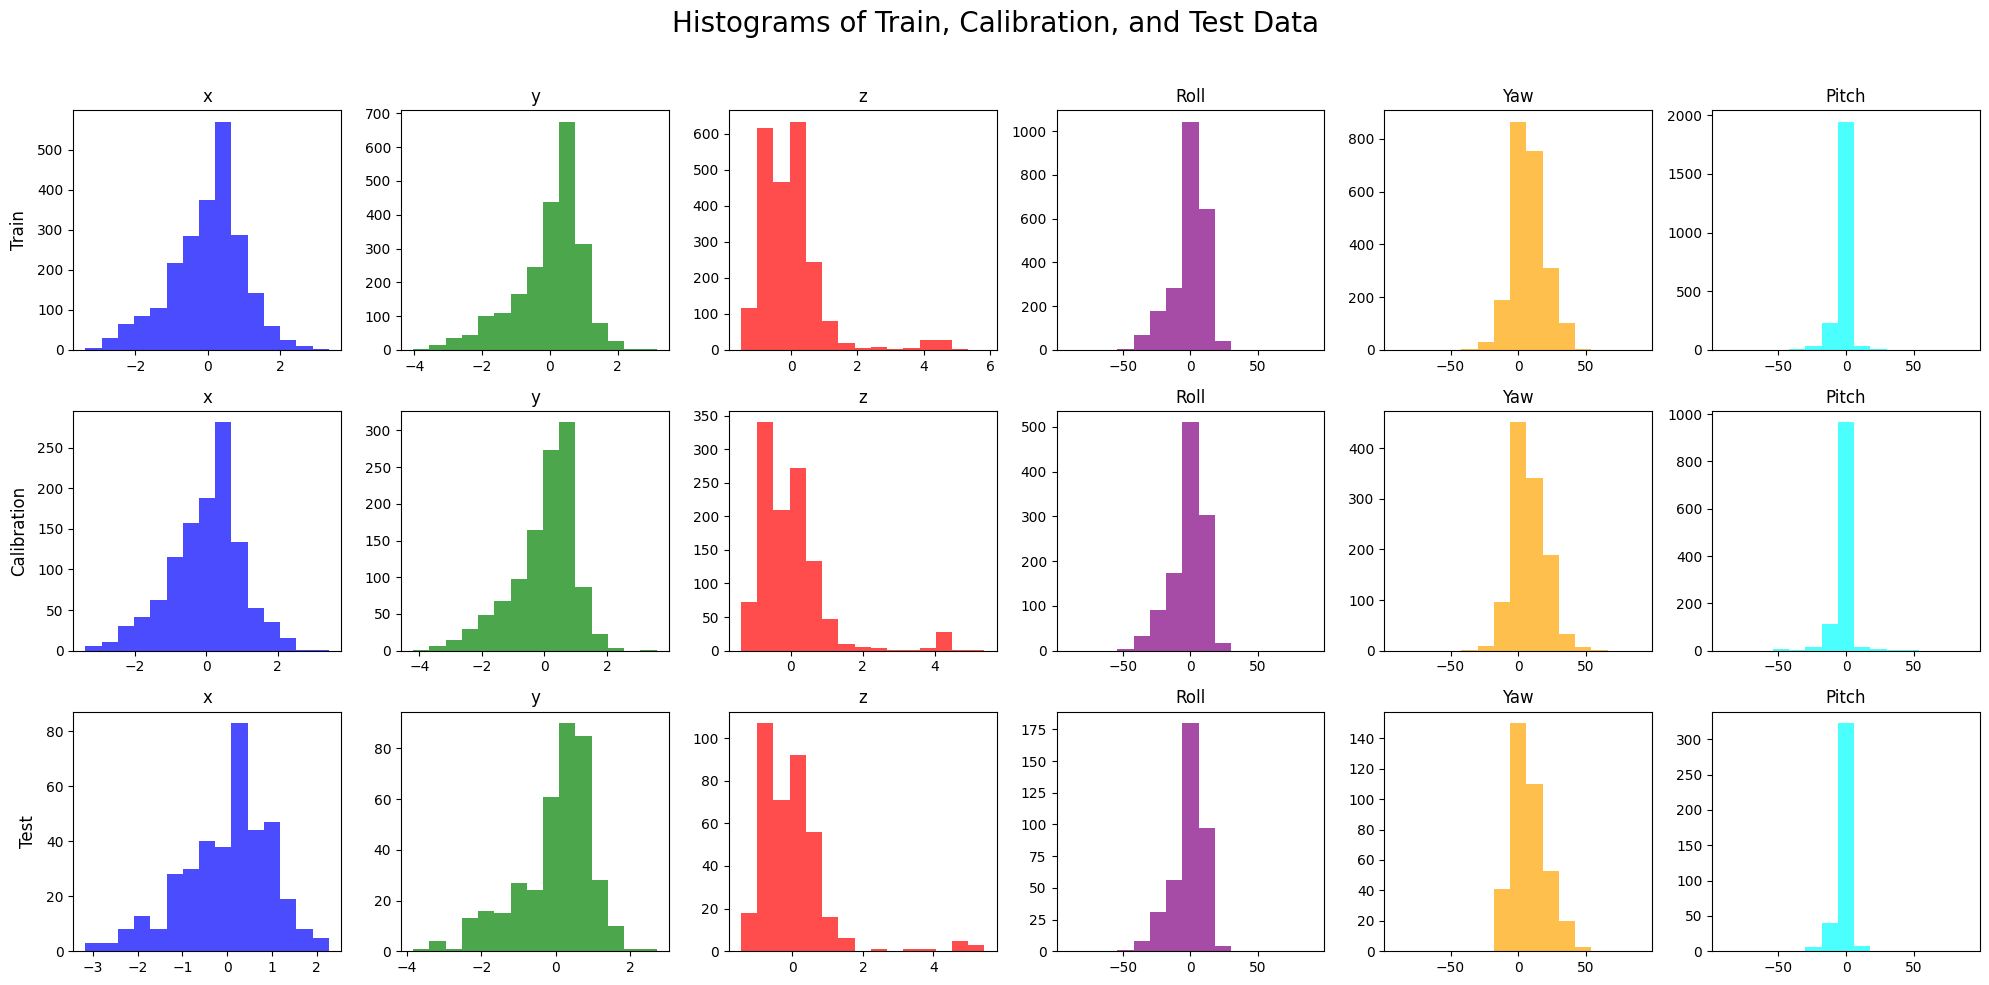

In [27]:
# Set number of bins for histograms
num_bins = 15

# Plot histograms
fig, axs = plt.subplots(3, 6, figsize=(20, 10))

data_sets = [
    (train_x, train_y, train_z, train_roll, train_yaw, train_pitch, "Train"),
    # (train_est_x, train_est_y, train_est_z, train_est_roll, train_est_yaw, train_est_pitch, "Train"),
    (cal_x, cal_y, cal_z, cal_roll, cal_yaw, cal_pitch, "Calibration"),
    # (cal_x, cal_y, cal_z, cal_roll, cal_yaw, cal_pitch, "Calibration"),
    (test_x, test_y, test_z, test_roll, test_yaw, test_pitch, "Test"),
    # (test_est_x, test_est_y, test_est_z, test_est_roll, test_est_yaw, test_est_pitch, "Test")
]

titles = ['x', 'y', 'z', 'Roll', 'Yaw', 'Pitch']

for i, (x, y, z, roll, yaw, pitch, dataset_title) in enumerate(data_sets):
    axs[i, 0].hist(x, bins=num_bins, color='blue', alpha=0.7)
    axs[i, 0].set_title(f'{titles[0]}')

    axs[i, 1].hist(y, bins=num_bins, color='green', alpha=0.7)
    axs[i, 1].set_title(f'{titles[1]}')

    axs[i, 2].hist(z, bins=num_bins, color='red', alpha=0.7)
    axs[i, 2].set_title(f'{titles[2]}')

    axs[i, 3].hist(roll, bins=num_bins, range=(-90, 90), color='purple', alpha=0.7)
    axs[i, 3].set_title(f'{titles[3]}')

    axs[i, 4].hist(yaw, bins=num_bins, range=(-90, 90), color='orange', alpha=0.7)
    axs[i, 4].set_title(f'{titles[4]}')

    axs[i, 5].hist(pitch, bins=num_bins, range=(-90, 90), color='cyan', alpha=0.7)
    axs[i, 5].set_title(f'{titles[5]}')

# Add overall titles for the sections
fig.suptitle('Histograms of Train, Calibration, and Test Data', fontsize=20)

# Add big titles for each section
axs[0, 0].annotate('Train', xy=(0, 0.5), xytext=(-axs[0, 0].yaxis.labelpad - 5, 0),
                   xycoords=axs[0, 0].yaxis.label, textcoords='offset points',
                   size='large', ha='center', va='center', rotation=90)

axs[1, 0].annotate('Calibration', xy=(0, 0.5), xytext=(-axs[1, 0].yaxis.labelpad - 5, 0),
                   xycoords=axs[1, 0].yaxis.label, textcoords='offset points',
                   size='large', ha='center', va='center', rotation=90)

axs[2, 0].annotate('Test', xy=(0, 0.5), xytext=(-axs[2, 0].yaxis.labelpad - 5, 0),
                   xycoords=axs[2, 0].yaxis.label, textcoords='offset points',
                   size='large', ha='center', va='center', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [28]:
import numpy as np
from scipy.stats import ks_2samp

# Assuming the data you provided is already normalized and available as arrays:
# train_x, train_y, train_z, train_roll, train_yaw, train_pitch
# train_est_x, train_est_y, train_est_z, train_est_roll, train_est_yaw, train_est_pitch
# cal_x, cal_y, cal_z, cal_roll, cal_yaw, cal_pitch
# test_x, test_y, test_z, test_roll, test_yaw, test_pitch
# test_est_x, test_est_y, test_est_z, test_est_roll, test_est_yaw, test_est_pitch

# Combine the data into numpy arrays for easier handling
train_data = np.column_stack((train_x, train_y, train_z, train_roll, train_yaw, train_pitch))
calibration_data = np.column_stack((cal_x, cal_y, cal_z, cal_roll, cal_yaw, cal_pitch))
test_data = np.column_stack((test_x, test_y, test_z, test_roll, test_yaw, test_pitch))

# Define a function to run the KS test
def ks_test(data1, data2):
    p_values = []
    for i in range(data1.shape[1]):
        stat, p_value = ks_2samp(data1[:, i], data2[:, i])
        p_values.append(round(p_value, 3))
    return p_values

# Run KS test between training and calibration sets
p_values_train_cal = ks_test(train_data, calibration_data)
# Run KS test between training and test sets
p_values_train_test = ks_test(train_data, test_data)
# Run KS test between calibration and test sets
p_values_cal_test = ks_test(calibration_data, test_data)

# Print the results
print("KS Test p-values between Train and Calibration:", p_values_train_cal)
print("KS Test p-values between Train and Test:", p_values_train_test)
print("KS Test p-values between Calibration and Test:", p_values_cal_test)


KS Test p-values between Train and Calibration: [0.995, 0.769, 0.504, 0.333, 0.947, 0.152]
KS Test p-values between Train and Test: [0.583, 0.987, 0.875, 0.069, 0.556, 0.534]
KS Test p-values between Calibration and Test: [0.482, 0.987, 0.958, 0.248, 0.481, 0.821]
